In [1]:
import sys
sys.path.append("/mnt/c/Users/dambr/Desktop/AstroCosmoComputational/Students/Anna_DAmbrosio/")

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",})

# Import your integration methods
from pyACC.Calculus import *

# Import integration class
from pyACC.cosmology import *

import scipy as sp
from scipy import interpolate
from scipy.misc import derivative

In [2]:
# target distribution
fun = lambda x: np.exp(-(x-1)**2)+np.exp(-(x-3)**2/2)
pdf = Function(fun)

# normalization
norm = pdf.Integrate(-1000,1000)
target = lambda x: (1/norm)*fun(x)

In [3]:
xin = 0.0
xf = 8.0
N = 1000000

In [4]:
sample, eff, prop = sampler.Rejection(target, xin, xf, N)

In [5]:
sample_gauss, eff_gauss, prop_gauss = sampler.Rejection(target, xin, xf, N, type='gaussian')

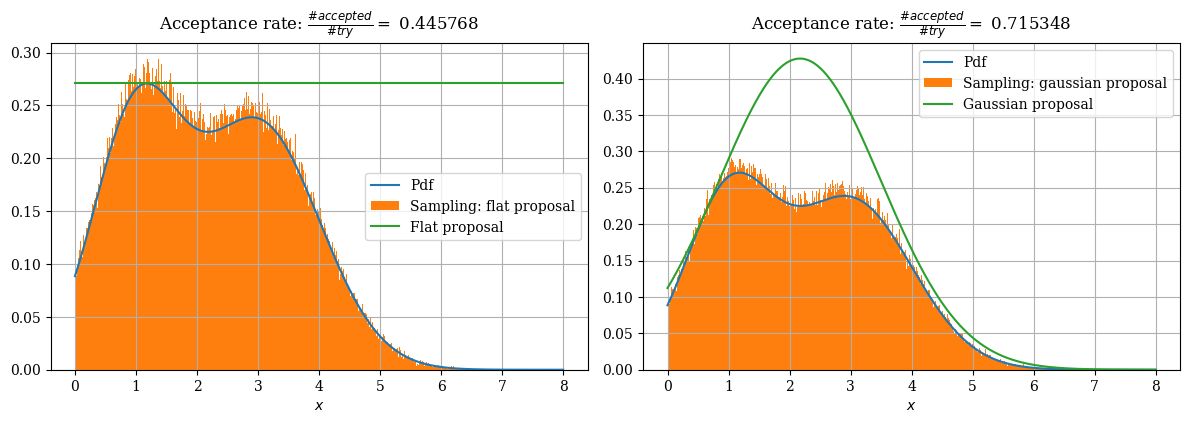

In [6]:
x = np.linspace(xin, xf, 1000)
target_fun = Function(target)
target_eval = target_fun.Value(x)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(x, target_eval, label='Pdf')
ax[1].plot(x, target_eval, label='Pdf')

ax[0].hist(sample,bins=1000,density='True', label='Sampling: flat proposal');
ax[1].hist(sample_gauss, bins=1000, density='True', label='Sampling: gaussian proposal');

ax[0].plot(x, prop(x), label='Flat proposal')
ax[1].plot(x, prop_gauss(x), label='Gaussian proposal')

for _ax in ax.flatten():
    _ax.grid(True)
    _ax.set_xlabel(r'$x$')
    _ax.legend()
fig.tight_layout()

ax[0].set_title(r'Acceptance rate: ' + r'$\frac{\# accepted}{\# try}=$ ' + str(eff));
ax[1].set_title(r'Acceptance rate: ' + r'$\frac{\# accepted}{\# try}=$ ' + str(eff_gauss));